# Energy Efficiency

## Kaggle API and Import Data

In [1]:
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.1 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110686 sha256=db25a64c41d2319cee32e9f9b16824750d65b95d320a2f7f440a2ad8184892e8
  Stored in directory: /home/baran/.cache/pip/wheels/6a/2b/d0/457dd27de499e9423caf738e743c4a3f82886ee6b19f89d5b7
Successfully built kaggle


In [6]:
!kaggle datasets download -d elikplim/eergy-efficiency-dataset

  0%|                                               | 0.00/6.22k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 6.22k/6.22k [00:00<00:00, 36.4MB/s]


In [7]:
import os

os.environ["KAGGLE_USERNAME"] = "barancanercan"
os.environ["KAGGLE_KEY"] = "1e0d6bf58061850b984c4441061d5911"

In [8]:
import zipfile

zip_file_path = "/home/baran/Desktop/PythonProjeleri/EnergyEfficiency/eergy-efficiency-dataset.zip" 

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("datasets")

print("Zip extracted successfully.")

Zip extracted successfully.


## Review the data

Specifically:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

In [48]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv("datasets/ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [12]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


<Axes: >

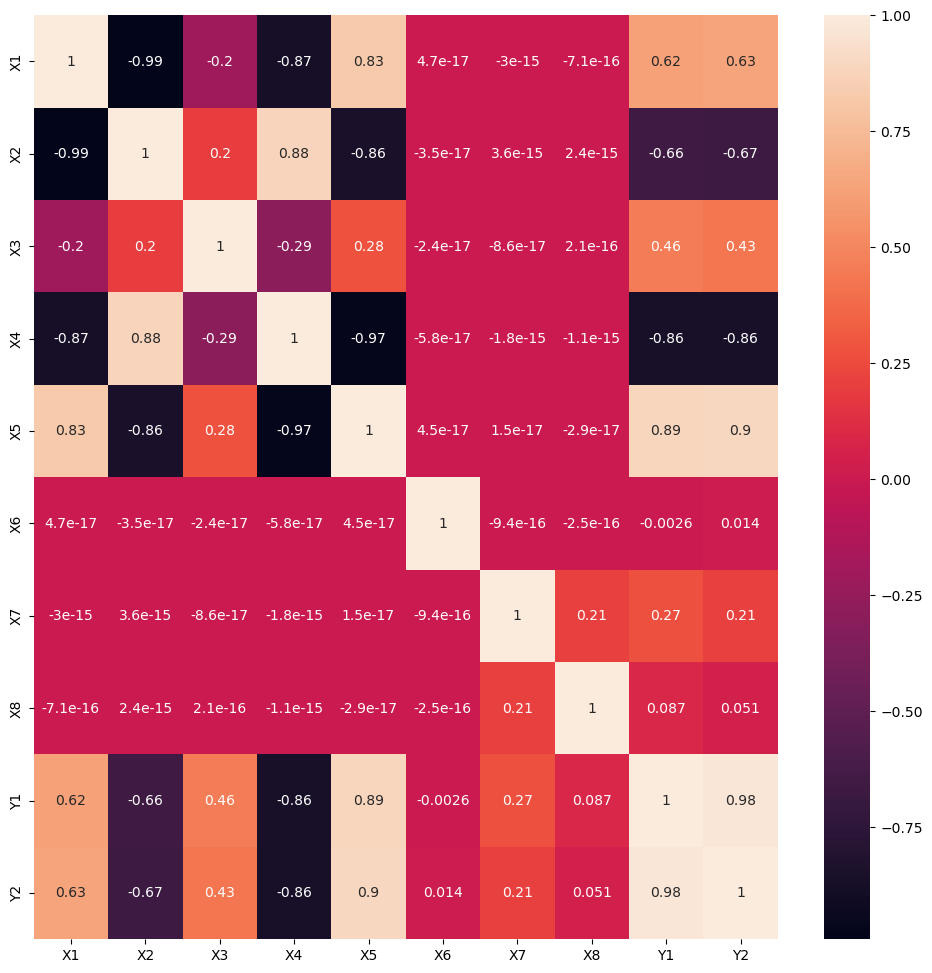

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini çizme
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)


## Separating data as test-train

In [16]:
X = df.drop(["Y1", "Y2"], axis=1)
y1 = df["Y1"]
y2 = df["Y2"]

In [31]:
from sklearn.model_selection import train_test_split

test_size = 0.3  
validation_size = 0.5  

X_train, X_temp, y1_train, y1_temp, y2_train, y2_temp = train_test_split(X, y1, y2, test_size=test_size, random_state=42)

X_val, X_test, y1_val, y1_test, y2_val, y2_test = train_test_split(X_temp, y1_temp, y2_temp, test_size=validation_size, random_state=42)


## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Fit Model
model = LinearRegression()
model.fit(X_train, y1_train)  # y1 Heating Load tahmini için

# Predict
y1_pred = model.predict(X_val)

# Error metric (RMSE)
rmse = mean_squared_error(y1_val, y1_pred, squared=False)
print("RMSE:", rmse)

RMSE: 3.1365218873611425


## DecisionTreeRegressor

In [56]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [43]:
#Normalize the inputs and set the output
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)

X = df.drop(['Y1','Y2'], axis=1)
X = nr.fit_transform(X)
y = df[['Y1','Y2']]

In [44]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [45]:
#Create model evaluation function
def evaluate(model, test_features, test_labels):
    from sklearn.metrics import r2_score
    predictions = model.predict(test_features)
    R2 = np.mean(r2_score(test_labels, predictions))
    print('R2 score = %.3f' % R2)
    return r2_score

In [46]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# Create decision tree model 
dt_model = DecisionTreeRegressor(random_state=123)
# Apply the model
dt_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)

In [49]:
#R2 score before optimization
R2_before_dt= evaluate(dt_model, X_test, y_test)

R2 score = 0.969


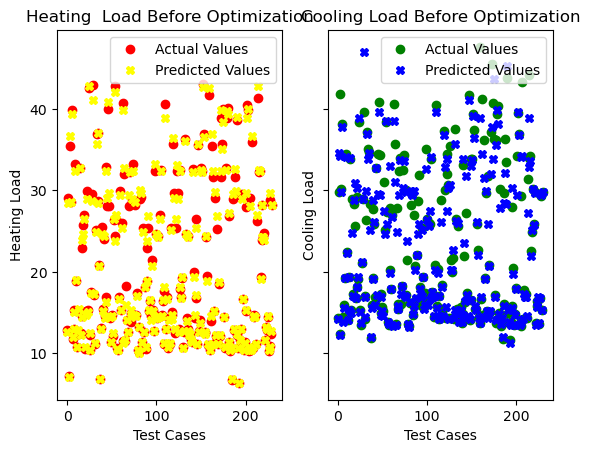

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [50]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred1[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred1[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

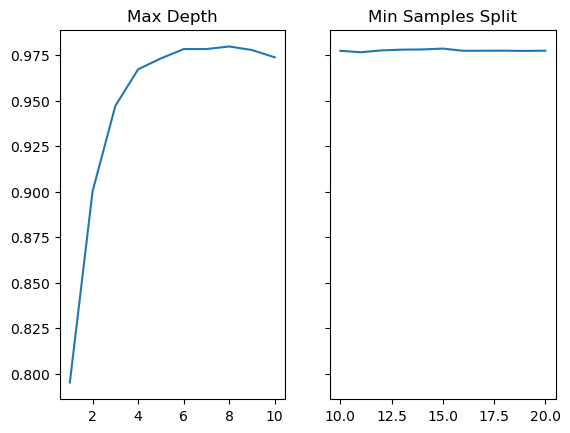

In [51]:
# Finding the best decision tree optimization parameters

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# Max Depth
dt_acc = []
dt_depth = range(1,11)
for i in dt_depth:
    dt = DecisionTreeRegressor(random_state=123, max_depth=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax1.plot(dt_depth,dt_acc)
ax1.set_title('Max Depth')

#Min Samples Split
dt_acc = []
dt_samples_split = range(10,21)
for i in dt_samples_split:
    dt = DecisionTreeRegressor(random_state=123, min_samples_split=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax2.plot(dt_samples_split,dt_acc)
ax2.set_title('Min Samples Split')

plt.show()

In [55]:
# RMSE hesaplama fonksiyonu
def calculate_rmse(predictions, targets):
    mse = mean_squared_error(targets, predictions)
    rmse = np.sqrt(mse)
    return rmse

# RMSE for Heating Load
y1_rmse = calculate_rmse(y_pred1[:, 0], y_test.iloc[:, 0])
print("RMSE for y1 Heating Load:", y1_rmse)

# RMSE for Cooling Load
y2_rmse = calculate_rmse(y_pred1[:, 1], y_test.iloc[:, 1])
print("RMSE for y2 Cooling Load:", y2_rmse)


RMSE for y1 Heating Load: 0.5747753184216132
RMSE for y2 Cooling Load: 2.228096172545645


In [57]:
import joblib

# Assuming 'model' is your trained DecisionTreeRegressor model
model_filename = "your_trained_model.joblib"
joblib.dump(model, model_filename)

['your_trained_model.joblib']